In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/Users/qiqintian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df=pd.read_csv('original.csv',index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 1 to 8819
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               8819 non-null   int64  
 1   Female            8819 non-null   int64  
 2   Racegrp           8819 non-null   object 
 3   Educ              8799 non-null   float64
 4   Unmarried         8367 non-null   float64
 5   Income            7653 non-null   float64
 6   CareSource        8819 non-null   object 
 7   Insured           8706 non-null   float64
 8   Weight            8625 non-null   float64
 9   Height            8628 non-null   float64
 10  BMI               8529 non-null   float64
 11  Obese             8529 non-null   float64
 12  Waist             8505 non-null   float64
 13  SBP               8511 non-null   float64
 14  DBP               8439 non-null   float64
 15  HDL               8802 non-null   float64
 16  LDL               8801 non-null   float64


In [5]:
print(df.shape)

(8819, 33)


In [6]:
print(df.isnull().sum())

Age                 0   
Female              0   
Racegrp             0   
Educ                20  
Unmarried           452 
Income              1166
CareSource          0   
Insured             113 
Weight              194 
Height              191 
BMI                 290 
Obese               290 
Waist               314 
SBP                 308 
DBP                 380 
HDL                 17  
LDL                 18  
Total Chol          16  
Dyslipidemia        0   
PVD                 0   
Activity            10  
PoorVision          567 
Smoker              0   
Hypertension        80  
Fam Hypertension    0   
Diabetes            2   
Fam Diabetes        0   
Stroke              11  
CVD                 23  
Fam CVD             419 
CHF                 36  
Anemia              6   
CKD                 2819
dtype: int64


In [7]:
# extract CKD is missing
CKD_non=df[df.CKD.isnull()]
df_new=df[~df.CKD.isnull()]

In [8]:
# labeled data
df_new.shape

(6000, 33)

In [9]:
# non-labeled data
CKD_non.shape

(2819, 33)

In [10]:
import missingno as msno

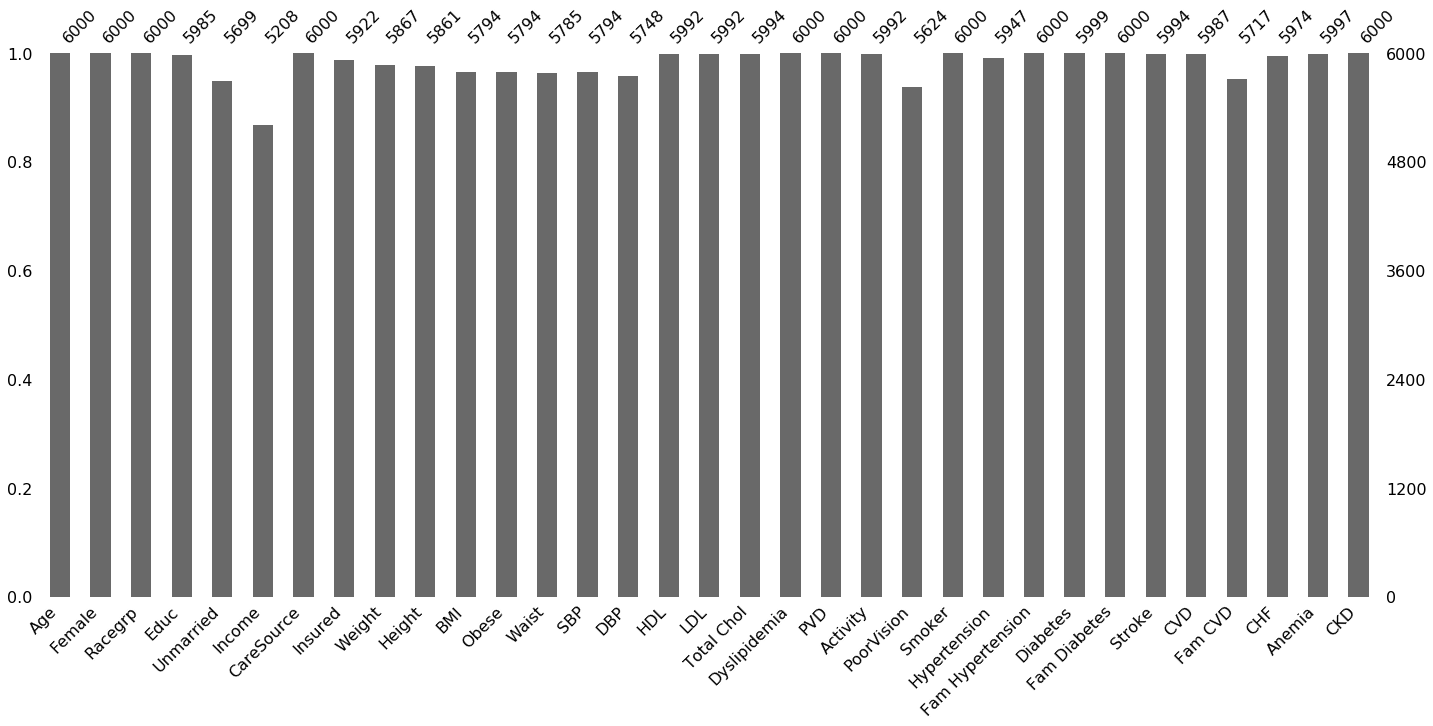

In [11]:
msno.bar(df_new)
plt.show()

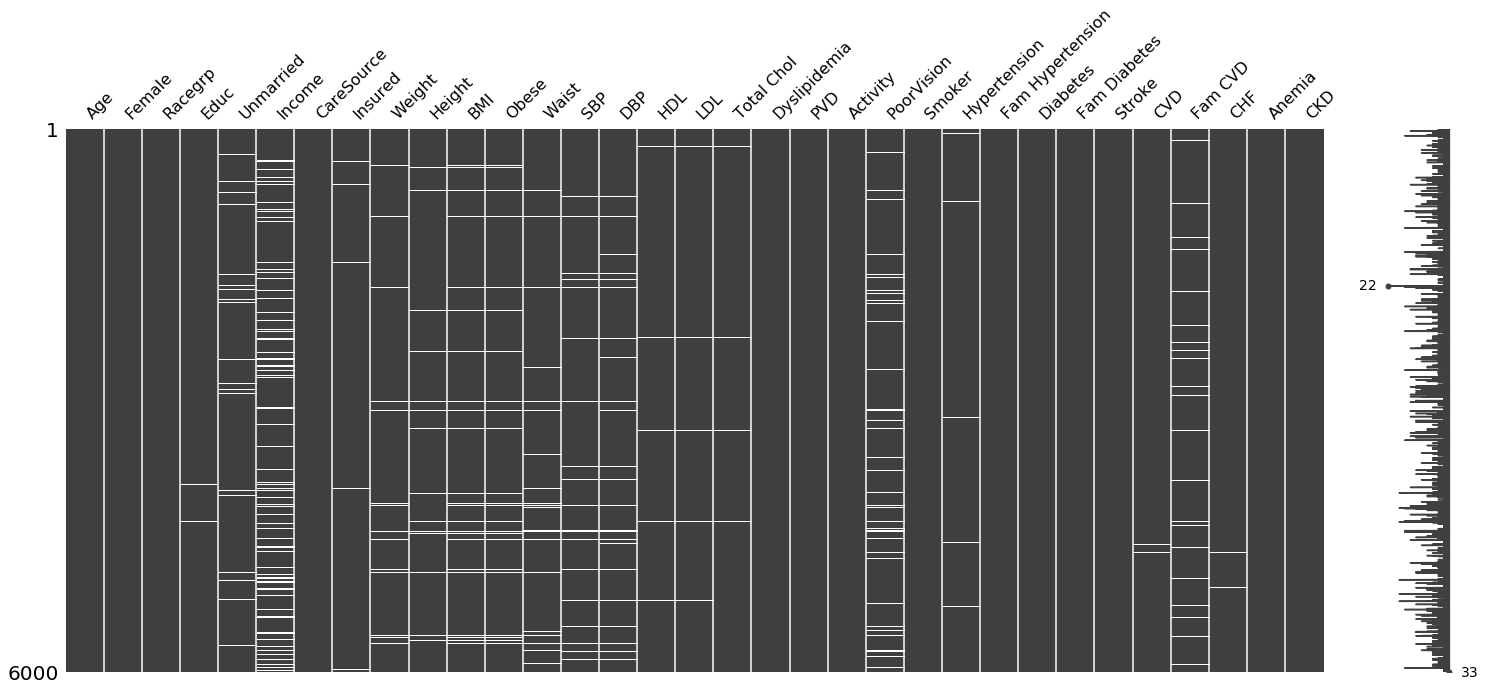

In [12]:
msno.matrix(df_new)
plt.show()

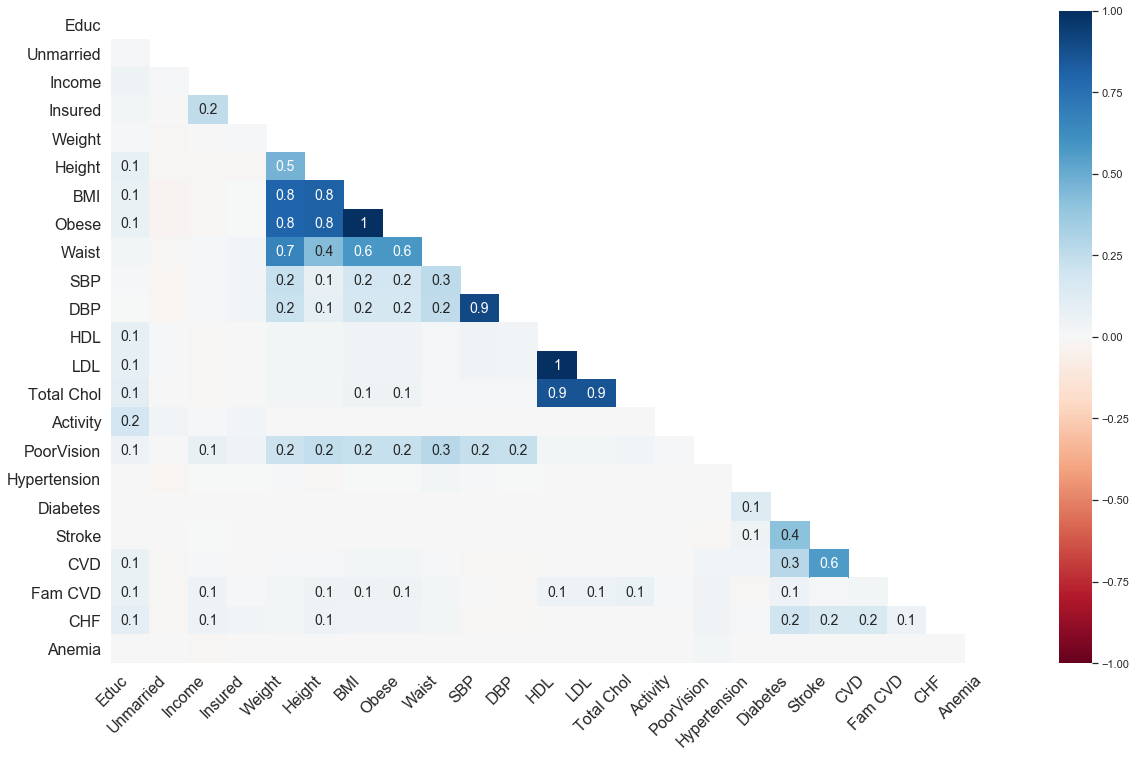

In [13]:
sns.set()
msno.heatmap(df_new)
plt.show()

In [14]:
# if we drop any rows with NA, we can get 4163 samples
# that means we will lose 1864 samples
df_new.dropna().shape

(4136, 33)

In [15]:
# thresh for rows
for i in range(28,34):
    print(i, ':', df_new.dropna(thresh=i,axis=0).shape[0])

28 : 5910
29 : 5874
30 : 5808
31 : 5669
32 : 5344
33 : 4136


In [16]:
# we could choose 32 as threshhold 
# means: any rows have two or more missing values will be removed
# we can get 5344 samples which is much better than threshhold equals 33
df_new=df_new.dropna(thresh=32,axis=0)

In [17]:
# lets take a look
# all of the feature has missing value are dummy variables
# maybe we can delete all of missing rows
# or we can delete the two columns (Unmarried and income)

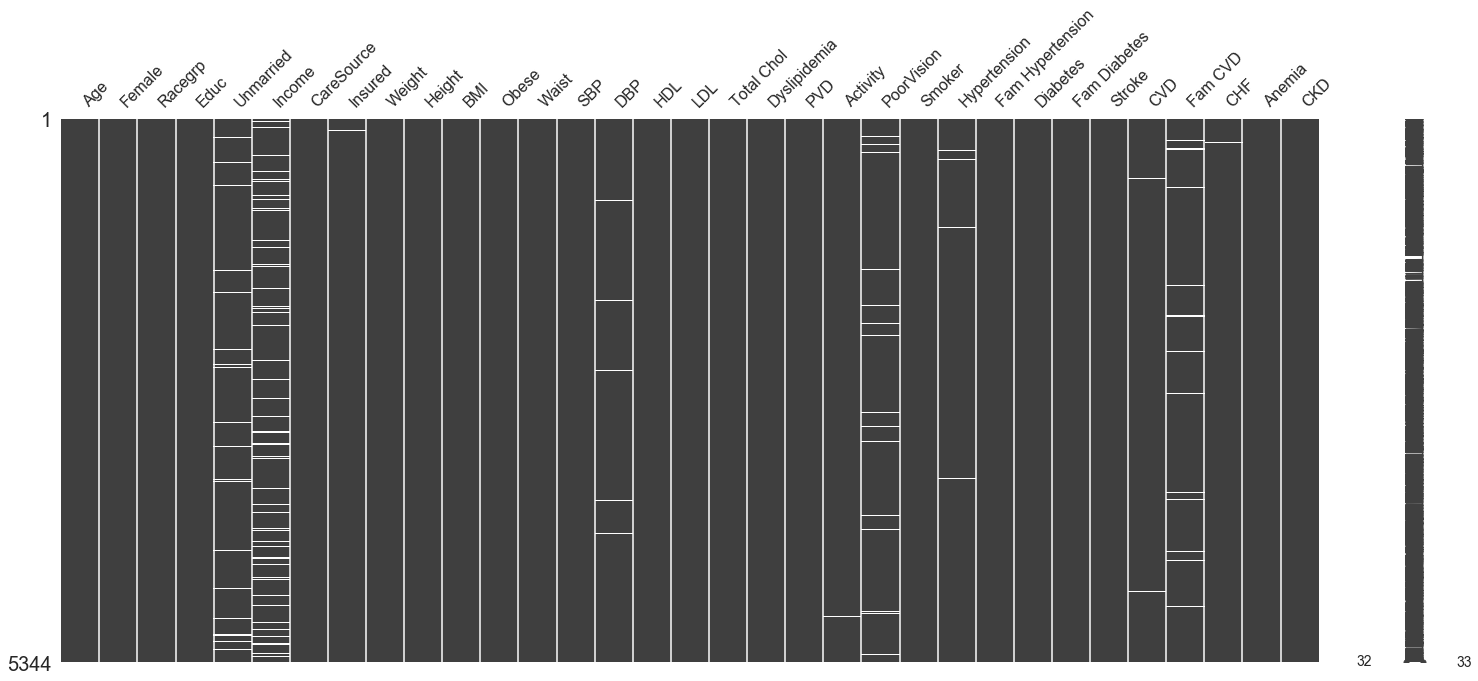

In [18]:
msno.matrix(df_new)
plt.show()

In [19]:
df_new['Unmarried'].corr(df_new['CKD'])

0.05393728592117232

In [20]:
df_new['Income'].corr(df_new['CKD'])

-0.08916604530128565

In [21]:
# Since the two columns correlation with ckd is low
# we may delete the two columns
df_new=df_new.drop(['Unmarried','Income'],axis=1)

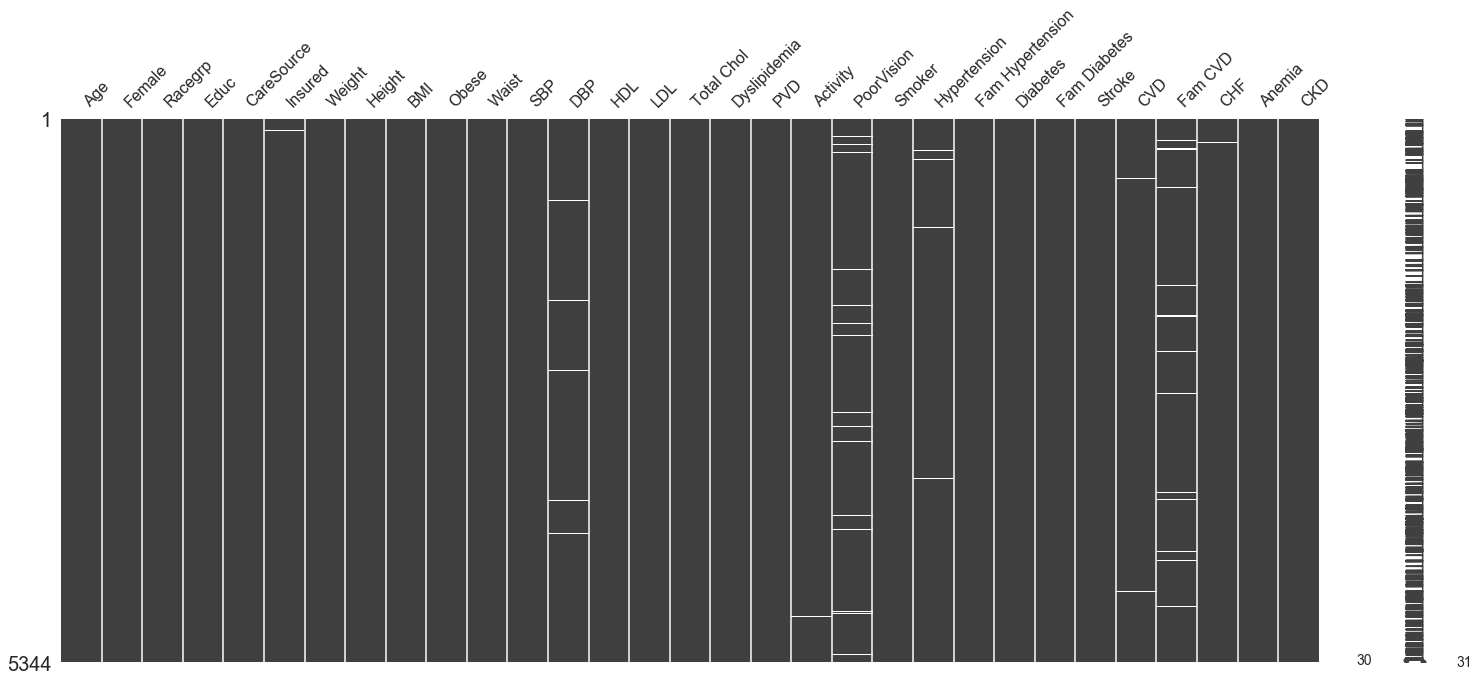

In [22]:
# it is pretty good now
msno.matrix(df_new)
plt.show()

In [23]:
# transform categorical to dummy encoding
df_dummy= df_new.copy()
df_dummy= pd.get_dummies(df_dummy,columns=['Racegrp'],drop_first=True)
df_dummy= pd.get_dummies(df_dummy,columns=['CareSource'],drop_first=True)

In [24]:
df_dummy.head()

,Age,Female,Educ,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_DrHMO,CareSource_clinic,CareSource_noplace,CareSource_other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65,1,0.0,1.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,3.0,0.0,1,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
2,36,1,0.0,0.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,3.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0
3,66,1,0.0,1.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
4,54,1,1.0,1.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,2.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0
5,63,1,0.0,1.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,1.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0


In [ ]:
# split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= 

In [27]:
from fancyimpute import IterativeImputer
from fancyimpute import KNN

In [29]:
knn_imputer=KNN()
df_knn=df_dummy.copy()
df_knn.iloc[:,:]=knn_imputer.fit_transform(df_knn)

Imputing row 1/5344 with 0 missing, elapsed time: 8.566
Imputing row 101/5344 with 0 missing, elapsed time: 8.568
Imputing row 201/5344 with 0 missing, elapsed time: 8.570
Imputing row 301/5344 with 0 missing, elapsed time: 8.571
Imputing row 401/5344 with 0 missing, elapsed time: 8.572
Imputing row 501/5344 with 0 missing, elapsed time: 8.573
Imputing row 601/5344 with 0 missing, elapsed time: 8.574
Imputing row 701/5344 with 0 missing, elapsed time: 8.575
Imputing row 801/5344 with 0 missing, elapsed time: 8.577
Imputing row 901/5344 with 0 missing, elapsed time: 8.578
Imputing row 1001/5344 with 0 missing, elapsed time: 8.579
Imputing row 1101/5344 with 0 missing, elapsed time: 8.580
Imputing row 1201/5344 with 0 missing, elapsed time: 8.581
Imputing row 1301/5344 with 0 missing, elapsed time: 8.582
Imputing row 1401/5344 with 0 missing, elapsed time: 8.583
Imputing row 1501/5344 with 0 missing, elapsed time: 8.584
Imputing row 1601/5344 with 0 missing, elapsed time: 8.585
Imputing 

In [32]:
MICE_imputer=IterativeImputer()
df_mice=df_dummy.copy()
df_mice.iloc[:,:]=MICE_imputer.fit_transform(df_mice)

In [33]:
# assert no missing
assert pd.notnull(df_mice).all().all()

In [34]:
#assert no missing
assert pd.notnull(df_knn).all().all()

In [35]:
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 1 to 6000
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5344 non-null   float64
 1   Female              5344 non-null   float64
 2   Educ                5344 non-null   float64
 3   Insured             5344 non-null   float64
 4   Weight              5344 non-null   float64
 5   Height              5344 non-null   float64
 6   BMI                 5344 non-null   float64
 7   Obese               5344 non-null   float64
 8   Waist               5344 non-null   float64
 9   SBP                 5344 non-null   float64
 10  DBP                 5344 non-null   float64
 11  HDL                 5344 non-null   float64
 12  LDL                 5344 non-null   float64
 13  Total Chol          5344 non-null   float64
 14  Dyslipidemia        5344 non-null   float64
 15  PVD                 5344 non-null   float64
 16  Activi

In [36]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5344 entries, 1 to 6000
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5344 non-null   float64
 1   Female              5344 non-null   float64
 2   Educ                5344 non-null   float64
 3   Insured             5344 non-null   float64
 4   Weight              5344 non-null   float64
 5   Height              5344 non-null   float64
 6   BMI                 5344 non-null   float64
 7   Obese               5344 non-null   float64
 8   Waist               5344 non-null   float64
 9   SBP                 5344 non-null   float64
 10  DBP                 5344 non-null   float64
 11  HDL                 5344 non-null   float64
 12  LDL                 5344 non-null   float64
 13  Total Chol          5344 non-null   float64
 14  Dyslipidemia        5344 non-null   float64
 15  PVD                 5344 non-null   float64
 16  Activi

In [37]:
df_knn.head()

,Age,Female,Educ,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_DrHMO,CareSource_clinic,CareSource_noplace,CareSource_other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,1.0,0.0,1.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,36.0,1.0,0.0,0.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,66.0,1.0,0.0,1.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54.0,1.0,1.0,1.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,63.0,1.0,0.0,1.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
